In [ ]:
import os

import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve
import tensorflow as tf
from google.colab import drive

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('drive/MyDrive/CardClassification')

In [ ]:
BATCH_SIZE = 128
IMAGE_SIZE = (128, 128)
data_dir = 'Card/'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'train',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'valid',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + 'test',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE
)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['ace of clubs', 'ace of diamonds', 'ace of hearts', 'ace of spades', 'eight of clubs', 'eight of diamonds', 'eight of hearts', 'eight of spades', 'five of clubs', 'five of diamonds', 'five of hearts', 'five of spades', 'four of clubs', 'four of diamonds', 'four of hearts', 'four of spades', 'jack of clubs', 'jack of diamonds', 'jack of hearts', 'jack of spades', 'joker', 'king of clubs', 'king of diamonds', 'king of hearts', 'king of spades', 'nine of clubs', 'nine of diamonds', 'nine of hearts', 'nine of spades', 'queen of clubs', 'queen of diamonds', 'queen of hearts', 'queen of spades', 'seven of clubs', 'seven of diamonds', 'seven of hearts', 'seven of spades', 'six of clubs', 'six of diamonds', 'six of hearts', 'six of spades', 'ten of clubs', 'ten of diamonds', 'ten of hearts', 'ten of spades', 'three of clubs', 'three of diamonds', 'three of hearts', 'three of spades', 'two of clubs', 'two of diamonds', 'two of hearts', 'two of spades']


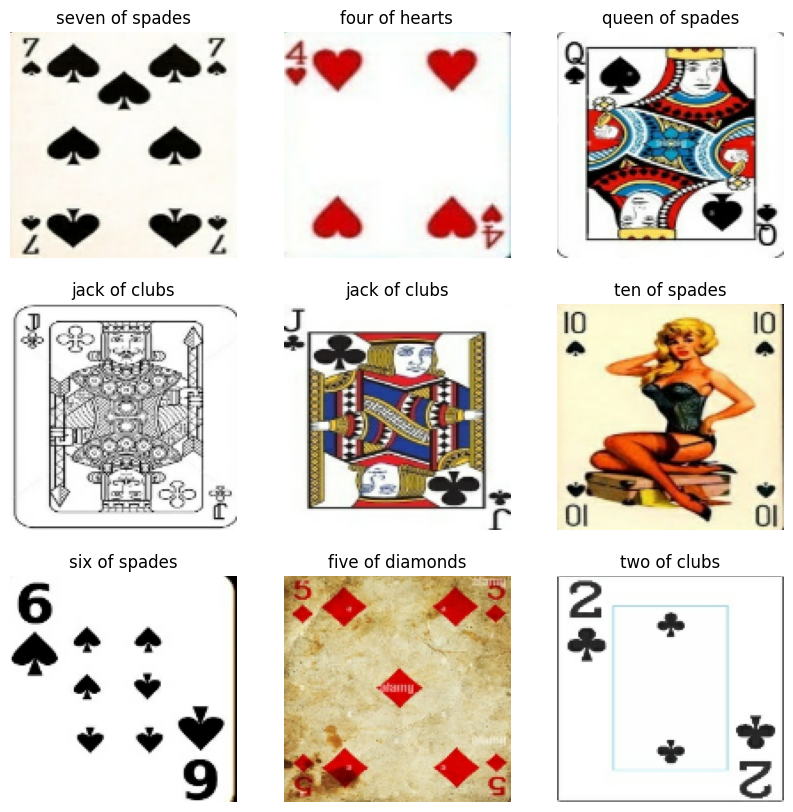

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
rescale = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)
])

In [ ]:
model = tf.keras.Sequential([
    rescale,
    data_augmentation,
    tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same', input_shape=(128, 128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(128, 128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=(128, 128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same', input_shape=(128, 128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same', input_shape=(128, 128, 128, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2056, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.build(input_shape=(128, 128, 128, 3))

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (128, 128, 128, 16)       448       
                                                                 
 max_pooling2d_30 (MaxPooli  (128, 64, 64, 16)         0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (128, 64, 64, 32)         4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (128, 32, 32, 32)         0         
 ng2D)                                               

In [ ]:
epochs = 200

history = model.fit(train_ds,
                    epochs=epochs,
                    validation_data=val_ds)


Epoch 1/200
60/60 [==============================] - 10s 77ms/step - loss: 3.9274 - accuracy: 0.0243 - val_loss: 3.7611 - val_accuracy: 0.0226
Epoch 2/200
60/60 [==============================] - 3s 47ms/step - loss: 3.7352 - accuracy: 0.0378 - val_loss: 3.5786 - val_accuracy: 0.0264
Epoch 3/200
60/60 [==============================] - 3s 46ms/step - loss: 3.5280 - accuracy: 0.0500 - val_loss: 3.1190 - val_accuracy: 0.0679
Epoch 4/200
60/60 [==============================] - 3s 46ms/step - loss: 3.2102 - accuracy: 0.0956 - val_loss: 2.8745 - val_accuracy: 0.1245
Epoch 5/200
60/60 [==============================] - 3s 48ms/step - loss: 2.9326 - accuracy: 0.1359 - val_loss: 2.5675 - val_accuracy: 0.1925
Epoch 6/200
60/60 [==============================] - 3s 50ms/step - loss: 2.6877 - accuracy: 0.1861 - val_loss: 2.2142 - val_accuracy: 0.2604
Epoch 7/200
60/60 [==============================] - 3s 50ms/step - loss: 2.5169 - accuracy: 0.2151 - val_loss: 2.0615 - val_accuracy: 0.2906
Epoch

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 13ms/step - loss: 0.8835 - accuracy: 0.7736


[0.8835253715515137, 0.7735849022865295]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

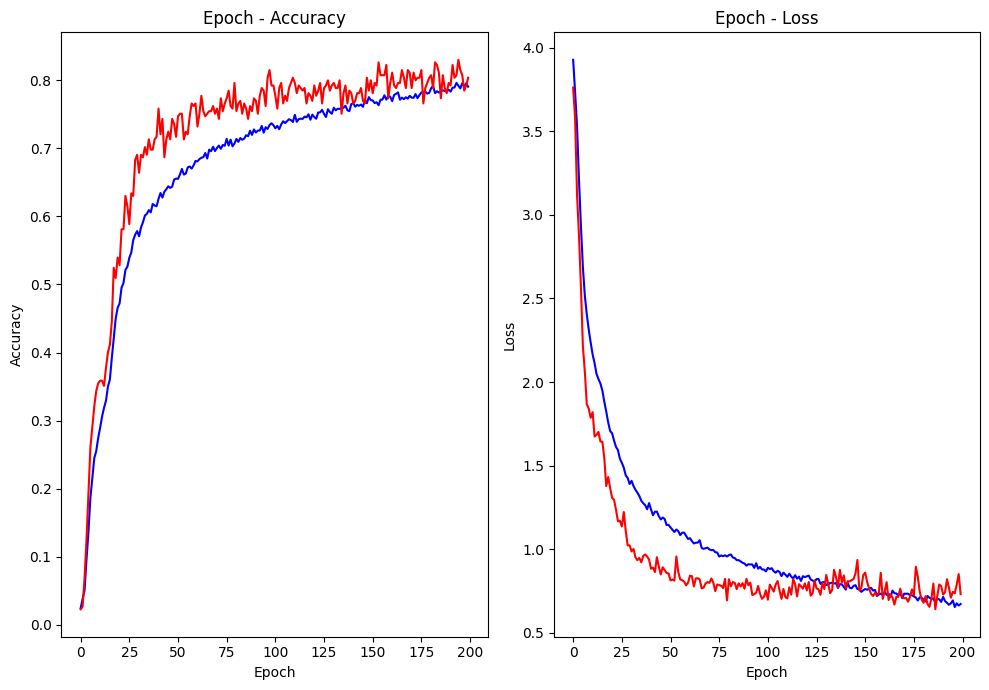

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), history_dict['accuracy'], c='b', label='accuracy')
plt.plot(range(epochs), history_dict['val_accuracy'], c='r', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch - Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), history_dict['loss'], c='b', label='loss')
plt.plot(range(epochs), history_dict['val_loss'], c='r', label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch - Loss')

plt.tight_layout()

In [ ]:
preds = model.predict(test_ds)
y_pred = [np.argmax(pred) for pred in preds]
y_pred

3/3 [==============================] - 0s 16ms/step


[48,
 14,
 7,
 45,
 50,
 49,
 26,
 4,
 36,
 47,
 21,
 27,
 15,
 26,
 7,
 27,
 39,
 13,
 30,
 13,
 15,
 38,
 0,
 12,
 12,
 40,
 19,
 9,
 17,
 3,
 42,
 45,
 49,
 30,
 9,
 39,
 51,
 39,
 10,
 25,
 19,
 12,
 5,
 6,
 10,
 15,
 36,
 16,
 23,
 33,
 6,
 17,
 43,
 21,
 17,
 46,
 48,
 19,
 50,
 50,
 0,
 37,
 30,
 14,
 33,
 27,
 6,
 45,
 26,
 49,
 29,
 3,
 25,
 22,
 22,
 50,
 32,
 46,
 11,
 32,
 42,
 18,
 14,
 24,
 41,
 6,
 52,
 23,
 32,
 10,
 31,
 34,
 5,
 31,
 2,
 41,
 31,
 26,
 3,
 22,
 3,
 19,
 2,
 24,
 8,
 5,
 15,
 44,
 21,
 1,
 13,
 5,
 47,
 36,
 50,
 29,
 4,
 18,
 45,
 47,
 38,
 49,
 11,
 1,
 42,
 46,
 30,
 52,
 5,
 9,
 7,
 22,
 40,
 13,
 44,
 5,
 1,
 3,
 23,
 12,
 7,
 37,
 24,
 5,
 28,
 44,
 24,
 36,
 14,
 38,
 23,
 16,
 33,
 32,
 8,
 19,
 29,
 31,
 36,
 49,
 7,
 3,
 18,
 44,
 37,
 0,
 35,
 43,
 24,
 11,
 21,
 11,
 4,
 41,
 0,
 4,
 39,
 40,
 21,
 25,
 3,
 15,
 44,
 3,
 2,
 34,
 29,
 43,
 3,
 21,
 51,
 11,
 4,
 51,
 12,
 39,
 14,
 10,
 49,
 35,
 39,
 0,
 29,
 38,
 22,
 32,
 41,
 9,
 13,
 2

In [ ]:
y_true = []

for _, label in test_ds:
  for result in label:
    y_true.append(result)

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\n')

Accuracy: 0.7735849056603774
Precision: 0.7983153638814017
Recall: 0.7735849056603774
F1 Score: 0.7667648912931933

